In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

784


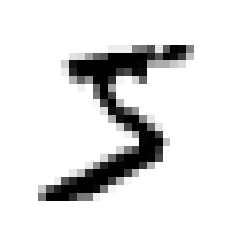

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [14]:
import numpy as np

y = y.astype(np.uint8)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
#Classify only number 8
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

#try stochastic gradient descent to train the network

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy measures


In [19]:
#Accuracy 
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.85245738, 0.9276    , 0.94119706])

In [21]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[50135,  4014],
       [ 1561,  4290]], dtype=int64)

In [31]:
#precision and recall
#PRECISION = TP/(TP+FP)
#RECALL = TP/(TP+FN)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_8, y_train_pred))

print(recall_score(y_train_8, y_train_pred))

0.5166184971098265
0.7332079986327124


In [33]:
#F1 score: precision and recall combined, harmonic mean of precision and recall. It gives much more weight to
#low values
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.6061462380784175